# Linear Regression
## Car_Price_Assignment

## Business Goal  
### Steps: 
1. Reading and understanding the data
2. Visualizing the data
3. Preparing the data for modelling (train-test plit, rescalling, etc.)
4. Training the model
5. Residual Analysis
6. Predictions 
7. Model evaluation on the test set

## Step 1: Reading and understanding the data:

In [1]:
# 1. Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Reading the data
car_df = pd.read_csv('C:/UpGrad/Course 2/ML Assignment/CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# 3. Data checking

car_df.shape

(205, 26)

In [4]:
# To see if there is any missing values and check the data types of the provided variables

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

The data does not have any missing values. Thus, there is no need to handle any missing data and we can work with this dataset.

In [5]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
# Dropping the uneccessary data:

car_df=car_df.drop('car_ID', axis=1)

In [7]:
car_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# 4. Data Extracting

car_df['carCompany']= car_df['CarName'].apply(lambda x: x.split( )[0])
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
car_df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'carCompany'],
      dtype='object')

In [11]:
# Checking for spelling mistakes in the extracted column

car_df.carCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
# Correcting the misspelled company names:

car_df['carCompany'].replace('maxda','mazda',inplace=True)
car_df['carCompany'].replace('Nissan','nissan',inplace=True)
car_df['carCompany'].replace('porcshce','porsche',inplace=True)
car_df['carCompany'].replace('toyouta','toyota',inplace=True)
car_df['carCompany'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [13]:
car_df.carCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
car_df=car_df.drop('CarName', axis=1)

In [15]:
car_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [16]:
# Symboling- Its assigned insurance risk rating: 
# A value of +3 ---> auto is risky, -3 ---> probably pretty safe.
# Thus we must treat this column as a categorical column, and assign it some categorical values.

car_df['symboling'] = car_df['symboling'].map({-3: 'extremely safe',-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'very risky'})

In [17]:
car_df['symboling'].unique()

array(['very risky', 'moderate', 'risky', 'safe'], dtype=object)

In [18]:
categorical_variables = list(car_df.columns[car_df.dtypes == 'object'])
categorical_variables

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'carCompany']

In [19]:
# To remove the uneccessary information from the list
#categorical_variables.pop(1)

In [20]:
#categorical_variables

Now we have all the categorical variables and required information about the cars.

## Step 2: Visualizing the Data:

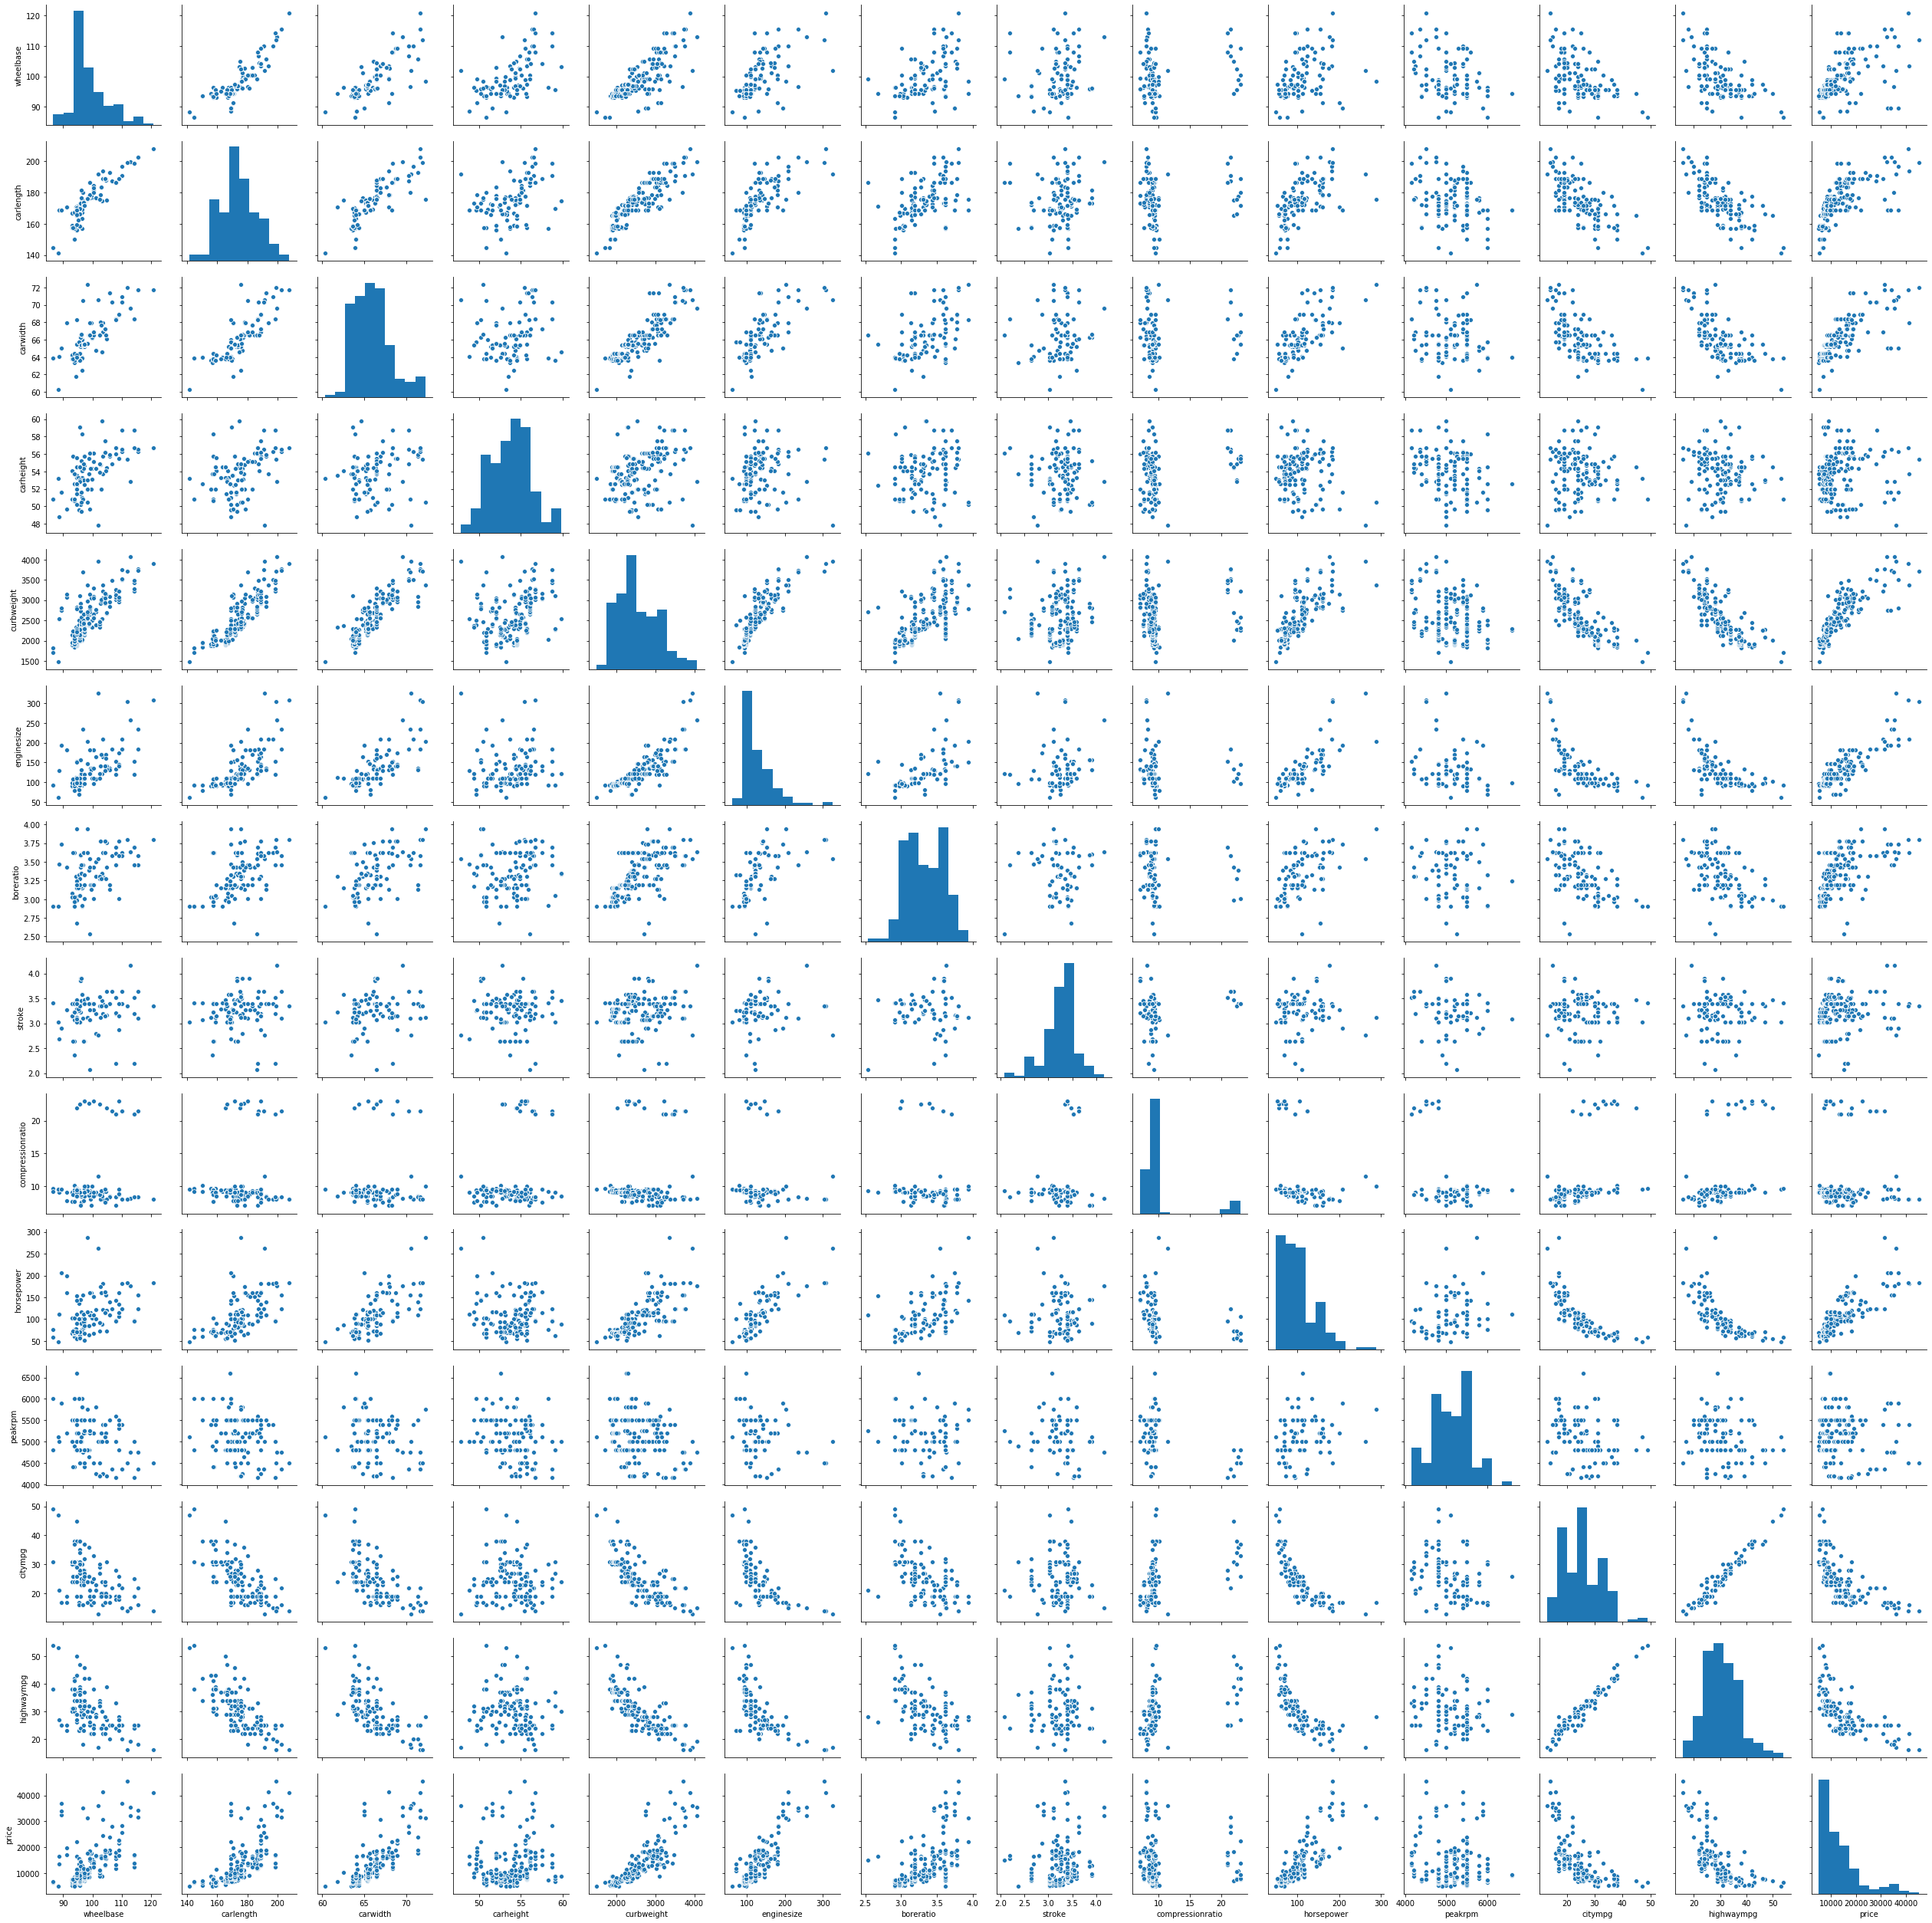

In [21]:
# Visualising the variables
# Numeric variables
sns.pairplot(car_df)

Since some independent numeric variables are seen to have correlation, we must consider linear regression for further analysis.

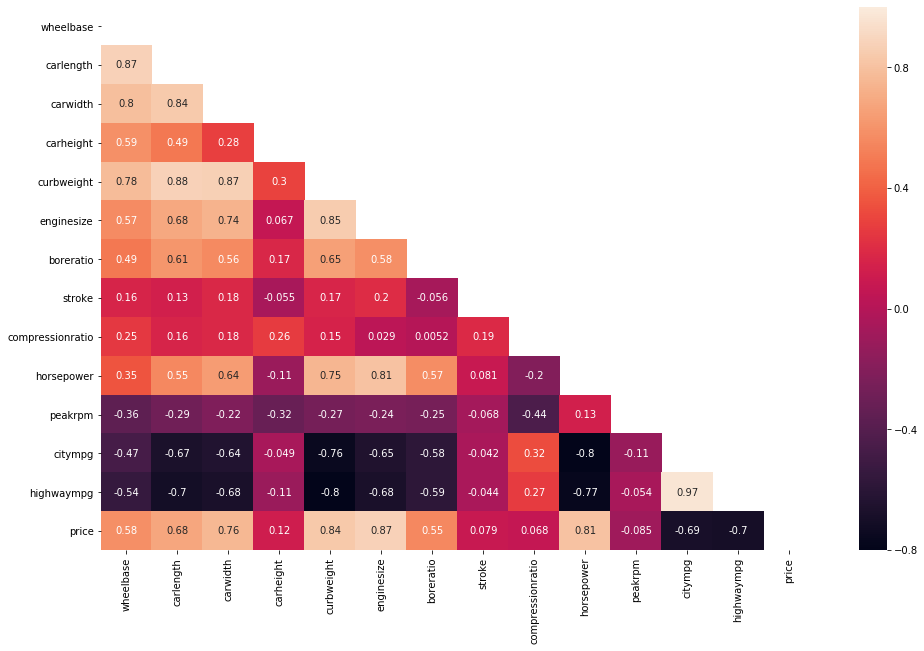

In [22]:
# Correlation between numeric variables

plt.figure(figsize = (16, 10))
cor=car_df.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool))
ax = sns.heatmap(cor,mask=mask,annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [23]:
cor=car_df.corr().iloc[:-1,-1]
cor.sort_values()

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
Name: price, dtype: float64

It can be seen that the most correlated numeric variables with price of cars are:
1. enginesize (high positive correlation)
2. curbweight (high positive correlation)
3. horsepower (high positive correlation)
4. carwidth (high positive correlation)
5. highwaympg (high negative correlation)
6. citympg (high negative correlation)
7. carlength (high positive correlation)

In [24]:
# Extracting only numeric variables from the  dataset
numeric_variables=car_df.drop(categorical_variables,axis=1)

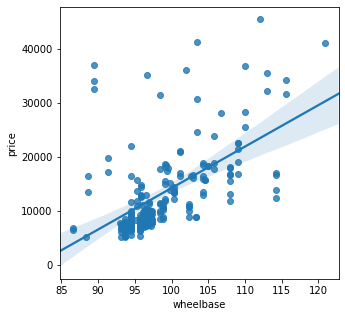

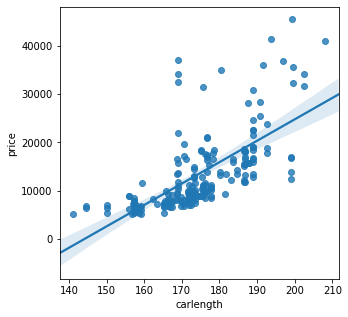

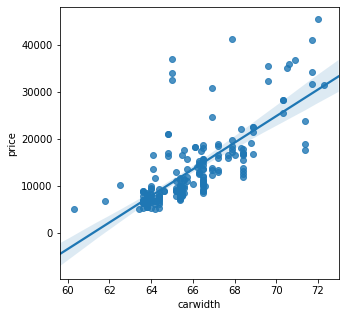

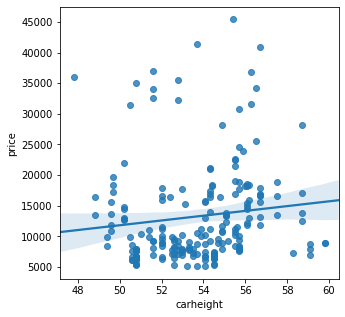

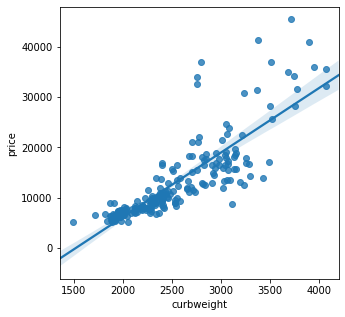

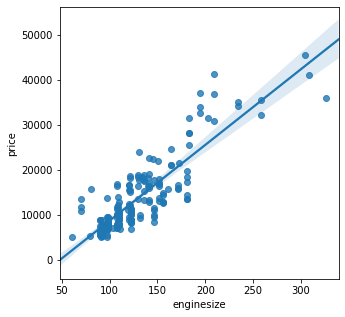

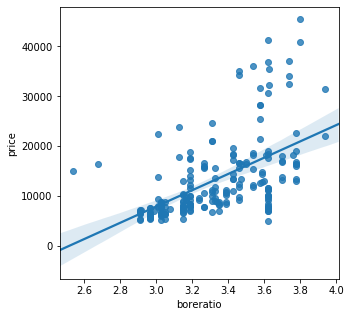

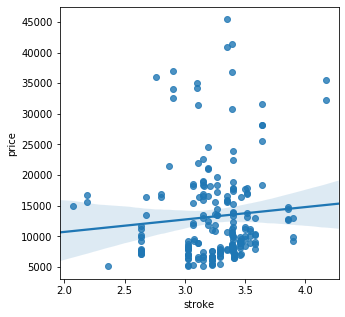

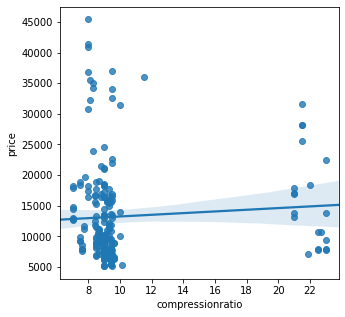

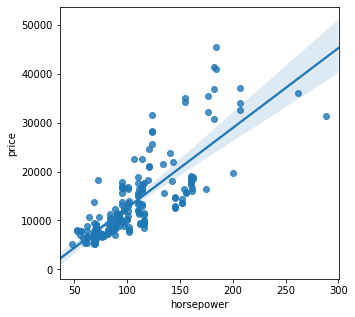

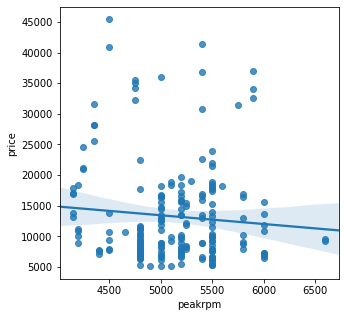

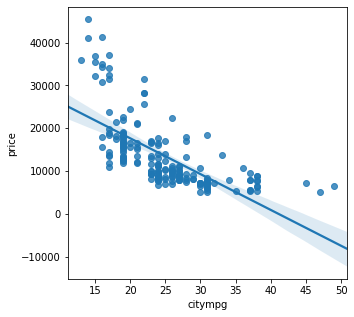

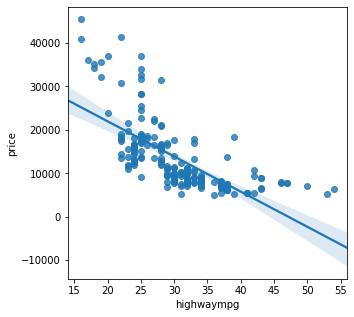

In [25]:
# Regression Plot for numeric variables:
for var in numeric_variables.iloc[:,:-1]:
    plt.figure(figsize=(5,5))
    plt.tight_layout(pad=3.0)
    sns.regplot(x=var, y='price', data=numeric_variables, scatter=True, fit_reg=True)

Observing the above regression plots, it can be concluded that all the variables interpreted from the heatmap are definitely correlated, however, there are some outliers in the data which can have an effect on how the line is fitted and the correlation coefficient is calculated.

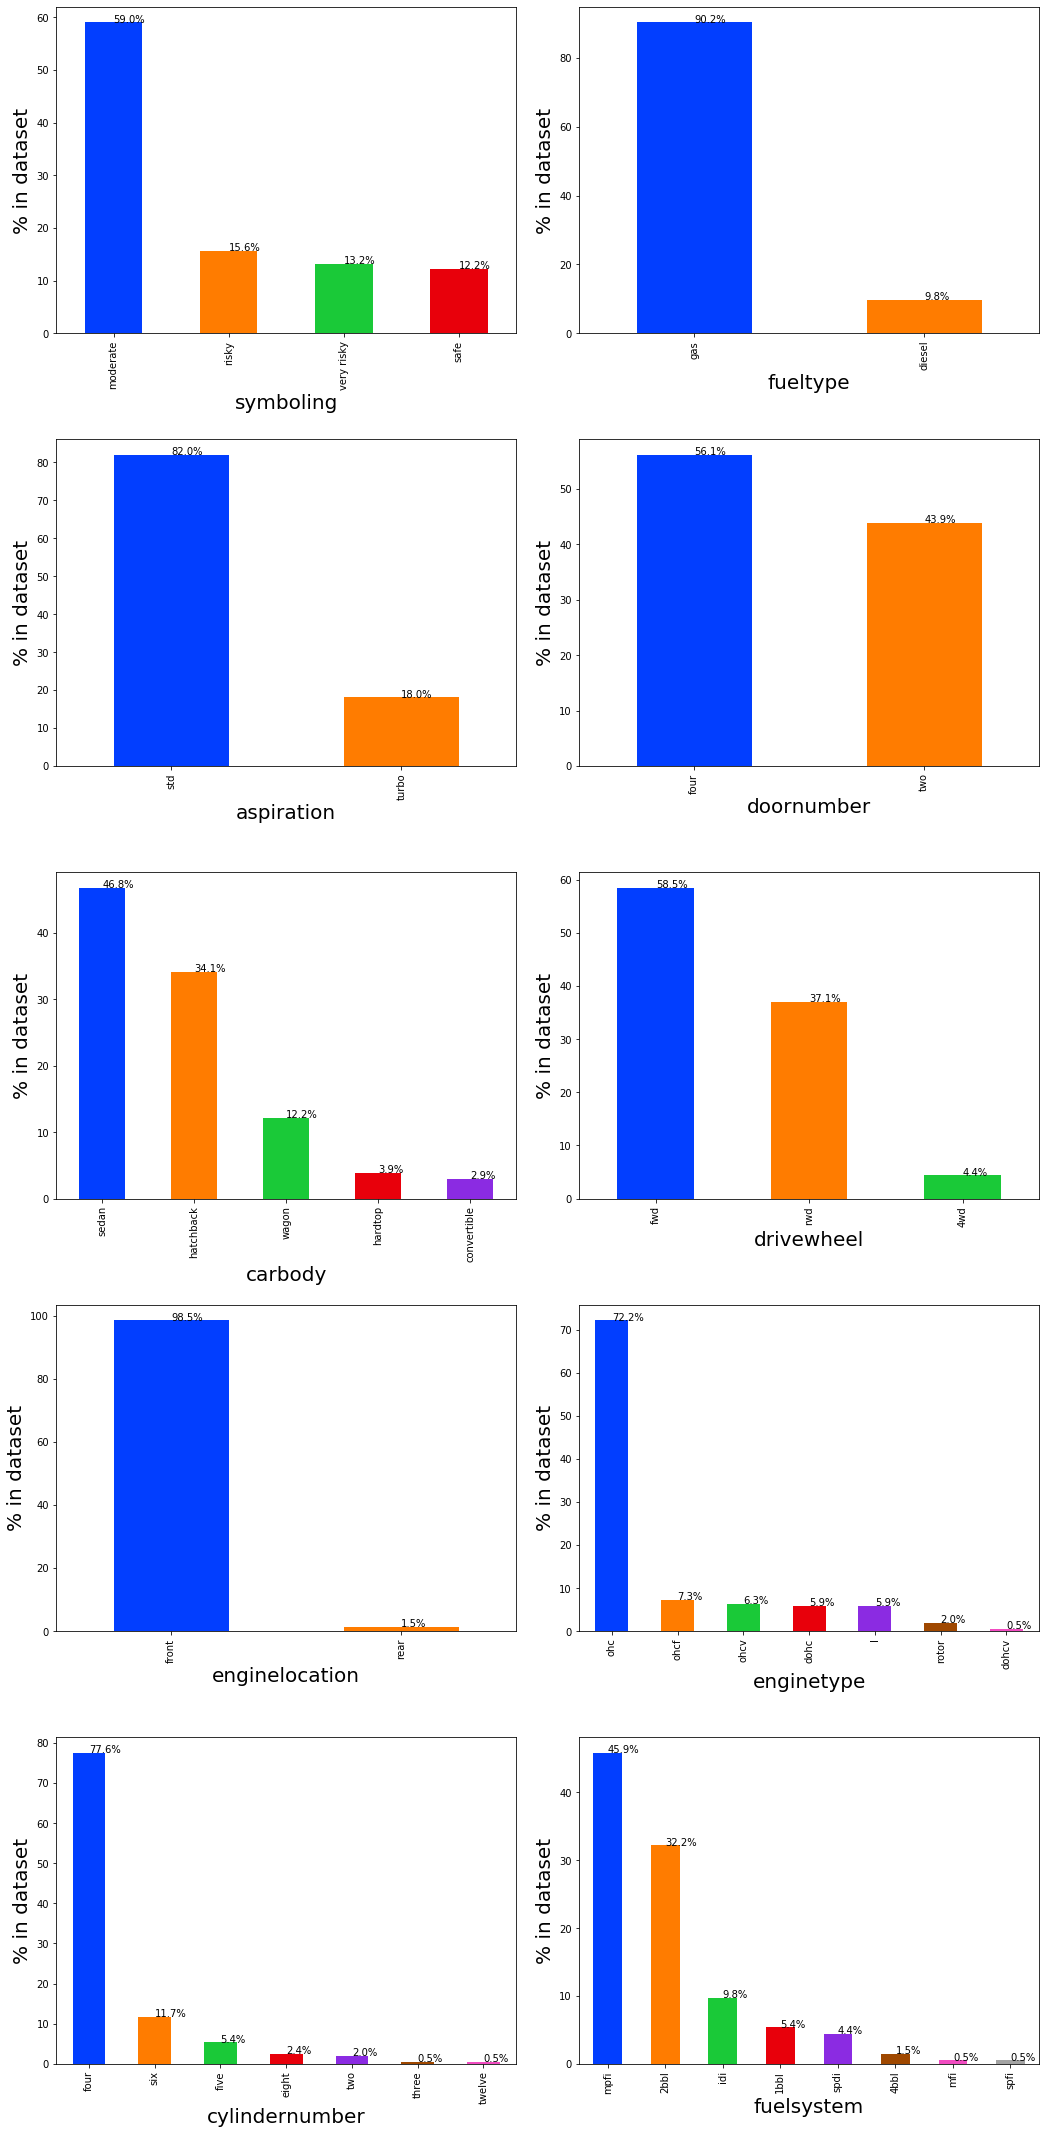

In [26]:
# Percentage of cars data with respect to features(i.e. Categorical variables)
# Plot the percentage of car's data in the US market with respect to different car features
plt.figure(figsize=(15, 30))
for var in categorical_variables[:-1]:
    plt.subplot(5,2,categorical_variables.index(var)+1)
    values = (car_df[var].value_counts(normalize=True)*100)
    plt.tight_layout(pad=2.0)
    ax = values.plot.bar(color=sns.color_palette('bright', 20))
    ax.set_ylabel('% in dataset', fontsize=20)
    ax.set_xlabel(var, fontsize=20)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate("%.1f" "%%" % height , (x + width*0.5, y + height + 0.01 ))

We can identify the some of the car features that are predominant in the US Automobile Market, Geely Automotives can consider these facts to full fill the market dominant needs and make the needed changes to their manufacturing line. These features are:

- symboling: moderate (0,1)
- carbody: sedan
- fueltype: gas
- aspiration: standard
- doornumbers: four
- drivewheel: forward
- engine location: front
- engine type: ohc
- cylinderNumber: four
- fuelSystem: mpfi

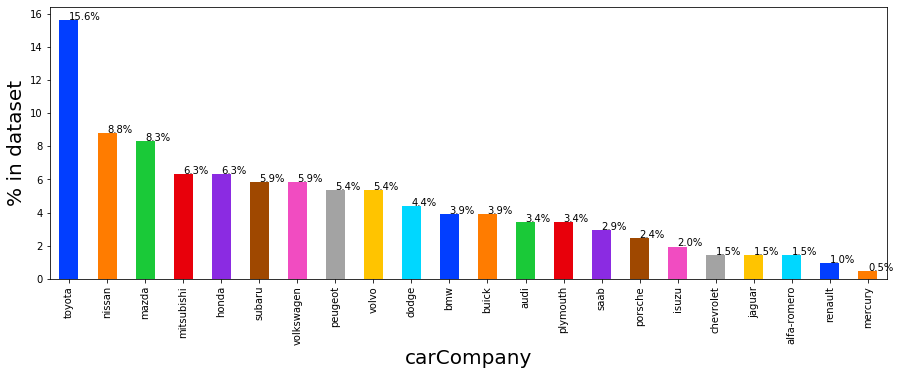

In [27]:
# Plot the percentage of car's in the US market with respect to different car brands

plt.figure(figsize=(15, 5))
values = (car_df[categorical_variables[-1]].value_counts(normalize=True)*100)
plt.tight_layout(pad=2.0)
ax = values.plot.bar(color=sns.color_palette('bright', 20))
ax.set_ylabel('% in dataset', fontsize=20)
ax.set_xlabel(categorical_variables[-1], fontsize=20)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate("%.1f" "%%" % height , (x + width*0.5, y + height + 0.01 ))

#### From the last graphical representation (carCompany vs % in dataset), it is clear that:

Toyota has a dominant market percentage in the US of 16%.

This is followed by:
- Nissan with 8.8%
- Mazda with 8.3%
- Mitsubishi and Honda are equally popular with 6.3% market percentage.

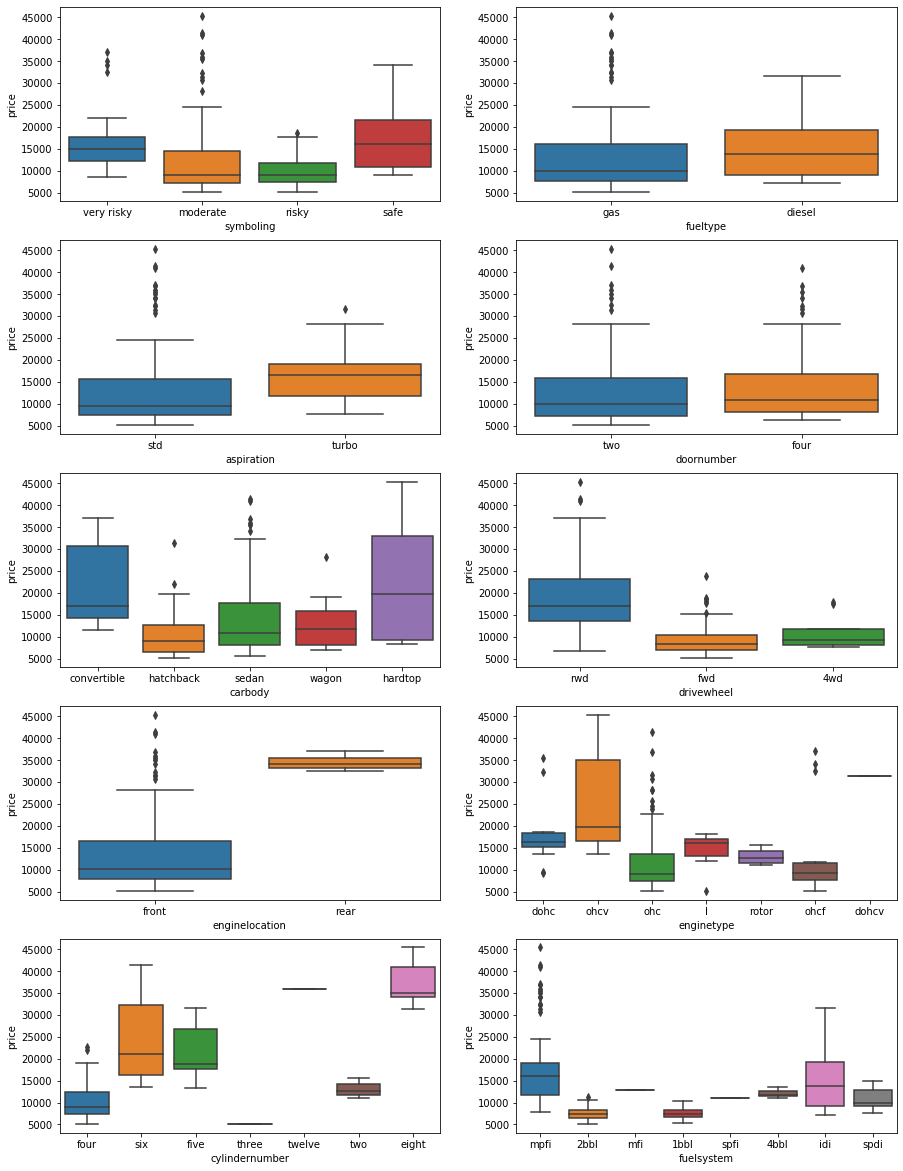

In [28]:
plt.figure(figsize=(15, 25))
plt.tight_layout(pad=2.0)
for var in categorical_variables[:-1]:
    plt.subplot(6,2,categorical_variables.index(var)+1)
    sns.boxplot(x = var, y = 'price', data = car_df)
plt.show()

Observations:

Although not significant but still the fuel type seems have an effect on the pricing of the cars.

- enginelocation and aspiration surely has a visible affect on the pricing of the car
- The price of real wheel drive is significantly higher that other drivewheel options.
- cylindernumber and engine type also seem to regulate the price of cars.
- hardtop and convertables cars are definatly priced higher than other body types available.Thus, carbody type is also contributing in determinig the price.

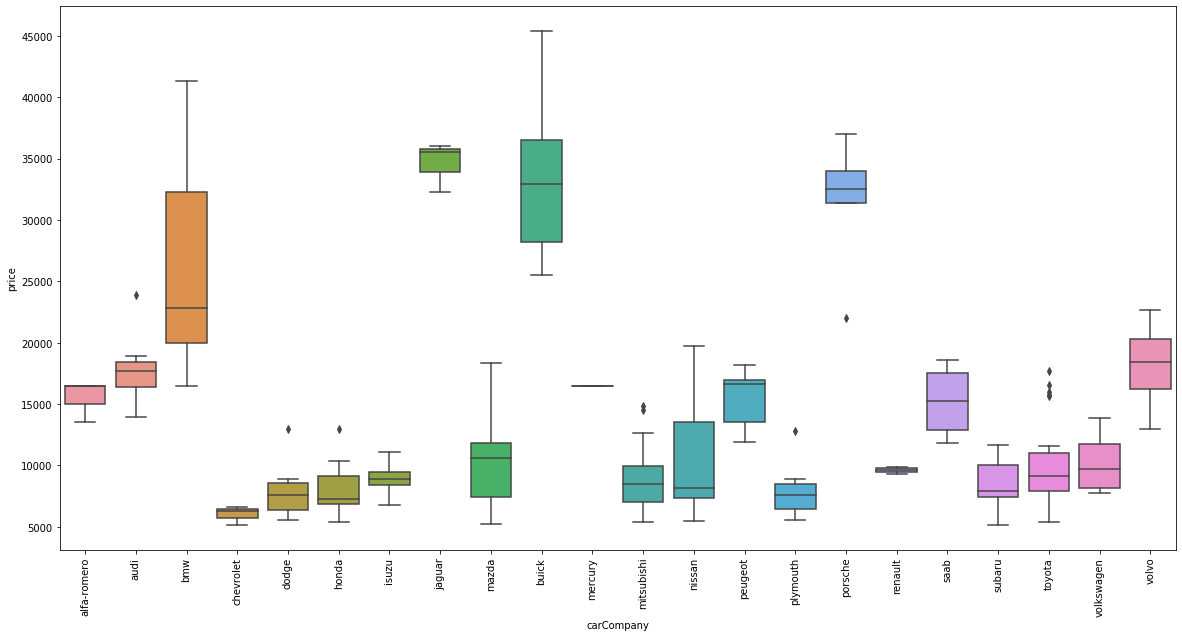

In [29]:
# with the different car brands

plt.figure(figsize=(20,10))
sns.boxplot(x = categorical_variables[-1], y = 'price', data = car_df)
plt.xticks(rotation=90)
plt.show()

#### Observation:

Each company has a range in which the cars are priced.

There are few outilers for these companies showing that they do manufacture some expensive cars which are priced above their usual market pricing range.

Cars manufacturers like jaguar, Buick, Porsche, BMW, Volo are clearly on the high end side, priced well above the average US cars price which is approximately $13,000.

Thus, it can be said that brand name shows some affect on the price determination.

## Step 3: Preparing the data for modelling (train-test plit, rescalling, etc.)


In [30]:
print('Average US car price: ',car_df['price'].mean())
print(car_df.groupby('carCompany').price.mean().sort_values(ascending=False))

Average US car price:  13276.710570731706
carCompany
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64


Since we saw that the company brand value also is determinig the pricing of the car, let's create a company_segment categorical variable which would suggest, under which segment tier does the car_company comes under.

We will segment the car companies based on the mean company price as

- lowtier if company mean price is below 10,000
- midtier if company mean price is above 10,000 and below 20,000
- hightier if company mean price is above 20,000

In [31]:
brand_seg_dict = { 'jaguar': 'hightier',
                    'buick' : 'hightier',
                    'porsche': 'hightier',
                    'bmw': 'hightier',
                    'volvo': 'midtier',
                    'audi': 'midtier',
                    'mercury': 'midtier',
                    'alfa-romero': 'midtier',
                    'peugeot': 'midtier',
                    'saab': 'midtier',
                    'mazda': 'midtier',
                    'nissan': 'midtier',
                    'volkswagen': 'midtier',
                    'toyota': 'lowtier',
                    'renault': 'lowtier',
                    'mitsubishi': 'lowtier',
                    'isuzu': 'lowtier',
                    'subaru': 'lowtier',
                    'honda': 'lowtier',
                    'plymouth': 'lowtier',
                    'dodge': 'lowtier',
                    'chevrolet': 'lowtier'}

car_df['brand_seg'] = car_df['carCompany'].map(brand_seg_dict)
# Dropping the orignal car_company variable
car_df.drop('carCompany',axis=1,inplace=True)
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_seg
0,very risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midtier
1,very risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midtier
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midtier
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midtier
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midtier


In [32]:
categorical_variables[categorical_variables.index('carCompany')] = 'brand_seg'

### Encoding the Categorical Variables:

In [33]:
# Checking the categorical variables:

for v in categorical_variables:
    print(v)
    print(car_df[v].unique())

symboling
['very risky' 'moderate' 'risky' 'safe']
fueltype
['gas' 'diesel']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
brand_seg
['midtier' 'hightier' 'lowtier']


In [35]:
# Introducing the dummy variables by replacing the categorical values:

encod_df = pd.DataFrame()
for var in car_df[categorical_variables]:
    new_df = pd.get_dummies(car_df[var]).add_prefix(var+"_")
    encod_df = pd.concat([encod_df, new_df], axis=1)
encod_df.columns
car_df1=pd.concat([car_df,encod_df],axis=1)

In [36]:
# Checking the new columns created:

car_df1.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'brand_seg',
       'symboling_moderate', 'symboling_risky', 'symboling_safe',
       'symboling_very risky', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five

In [37]:
car_df1

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_seg_hightier,brand_seg_lowtier,brand_seg_midtier
0,very risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,1,0,0,0,0,1
1,very risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,1,0,0,0,0,1
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,1,0,0,0,0,1
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,1,0,0,0,0,1
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,safe,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,0,1
201,safe,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,0,0,0,0,1,0,0,0,0,1
202,safe,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,0,0,0,0,1,0,0,0,0,1
203,safe,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,0,0,1,0,0,0,0,0,0,1


In [38]:
# Dropping the original columns:

car_df1 = car_df1.drop(car_df1[categorical_variables],axis=1)

In [39]:
car_df1.head(20)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_seg_hightier,brand_seg_lowtier,brand_seg_midtier
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,1,0,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,1,0,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,1,0,0,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,1,0,0,0,0,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,1,0,0,0,0,1
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,1,0,0,0,0,1
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,0,0,0,0,1,0,0,0,0,1
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,0,0,0,0,1,0,0,0,0,1
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,...,0,0,0,0,1,0,0,0,0,1
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,...,0,0,0,0,1,0,0,0,0,1


### Splitting the data into train and test:

In [40]:
# Package for train-test split:

import sklearn
from sklearn.model_selection import train_test_split

In [41]:
df_train, df_test = train_test_split(car_df1, train_size = 0.7, random_state = 100)

In [42]:
print(df_train.shape)
print(df_test.shape)

(143, 59)
(62, 59)


In [43]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_seg_hightier,brand_seg_lowtier,brand_seg_midtier
122,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,...,1,0,0,0,0,0,0,0,1,0
125,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,...,0,0,0,0,1,0,0,1,0,0
166,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,...,0,0,0,0,1,0,0,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,1,0,0,0,0,1
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,...,0,0,0,0,1,0,0,0,0,1


### Rescaling the Features:

In [44]:
# Feature Scaling:

from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.

In [45]:
#Steps:
# 1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric vars
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg', 'price']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_seg_hightier,brand_seg_lowtier,brand_seg_midtier
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,1,0,0,0,0,0,0,0,1,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,1,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,1,0,0,0,1,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,1,0,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,1,0,0,0,0,1


In [46]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_seg_hightier,brand_seg_lowtier,brand_seg_midtier
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.118881,0.468531,0.412587
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.324786,0.500763,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [47]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('price')
X_train = df_train

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 58 columns):
wheelbase                143 non-null float64
carlength                143 non-null float64
carwidth                 143 non-null float64
carheight                143 non-null float64
curbweight               143 non-null float64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
compressionratio         143 non-null float64
horsepower               143 non-null float64
peakrpm                  143 non-null float64
citympg                  143 non-null float64
highwaympg               143 non-null float64
symboling_moderate       143 non-null uint8
symboling_risky          143 non-null uint8
symboling_safe           143 non-null uint8
symboling_very risky     143 non-null uint8
fueltype_diesel          143 non-null uint8
fueltype_gas             143 non-null uint8
aspiration_std           143 non-

### Building model using the LinearRegression
Function from SciKit Learn for its compatibility with **RFE**

#### RFE (Recursive feature elimination)

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 7),
 ('carlength', False, 18),
 ('carwidth', True, 1),
 ('carheight', False, 11),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 5),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 28),
 ('highwaympg', False, 8),
 ('symboling_moderate', False, 25),
 ('symboling_risky', False, 24),
 ('symboling_safe', False, 16),
 ('symboling_very risky', True, 1),
 ('fueltype_diesel', False, 4),
 ('fueltype_gas', True, 1),
 ('aspiration_std', False, 23),
 ('aspiration_turbo', False, 14),
 ('doornumber_four', False, 37),
 ('doornumber_two', False, 32),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 20),
 ('carbody_sedan', False, 22),
 ('carbody_wagon', False, 21),
 ('drivewheel_4wd', False, 29),
 ('drivewheel_fwd', False, 17),
 ('drivewheel_rwd', False, 30),
 ('enginelocation_front', True, 1),
 ('enginelocation_rear', True, 1),
 ('

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'symboling_very risky', 'fueltype_gas',
       'carbody_convertible', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'brand_seg_hightier'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'citympg',
       'highwaympg', 'symboling_moderate', 'symboling_risky', 'symboling_safe',
       'fueltype_diesel', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcf', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'brand_seg_lowtier', 'brand_seg_midtier'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
# Packages:

import statsmodels
import statsmodels.api as sm
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Calculate the VIFs for the new model

def calVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [57]:
#Function to fit the linear regression model from the statmodel package

def fit_LRM(X_train):
# Creating X_train dataframe with the selected variables
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [58]:
lm=fit_LRM(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.14e-72
Time:                        18:09:55   Log-Likelihood:                 234.02
No. Observations:                 143   AIC:                            -430.0
Df Residuals:                     124   BIC:                            -373.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

It is observed from above statistics that:
For **peakrpm** p-value > 0.05, thus, it can be inferred that peakrpm is insignificant in presence of other variables; it can be dropped.

## Step 4: Training the model:


In [59]:
X_train1 = X_train_rfe.drop('peakrpm', axis=1)

In [60]:
lm1=fit_LRM(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.25e-73
Time:                        18:09:58   Log-Likelihood:                 231.83
No. Observations:                 143   AIC:                            -427.7
Df Residuals:                     125   BIC:                            -374.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [61]:
calVIF(X_train1)

,Features,VIF
17,cylindernumber_two,inf
14,enginetype_rotor,inf
9,enginelocation_front,73.12
2,enginesize,22.59
1,curbweight,11.87
5,horsepower,8.75
0,carwidth,5.20
18,brand_seg_hightier,3.58
4,stroke,3.31
12,enginetype_ohc,3.19


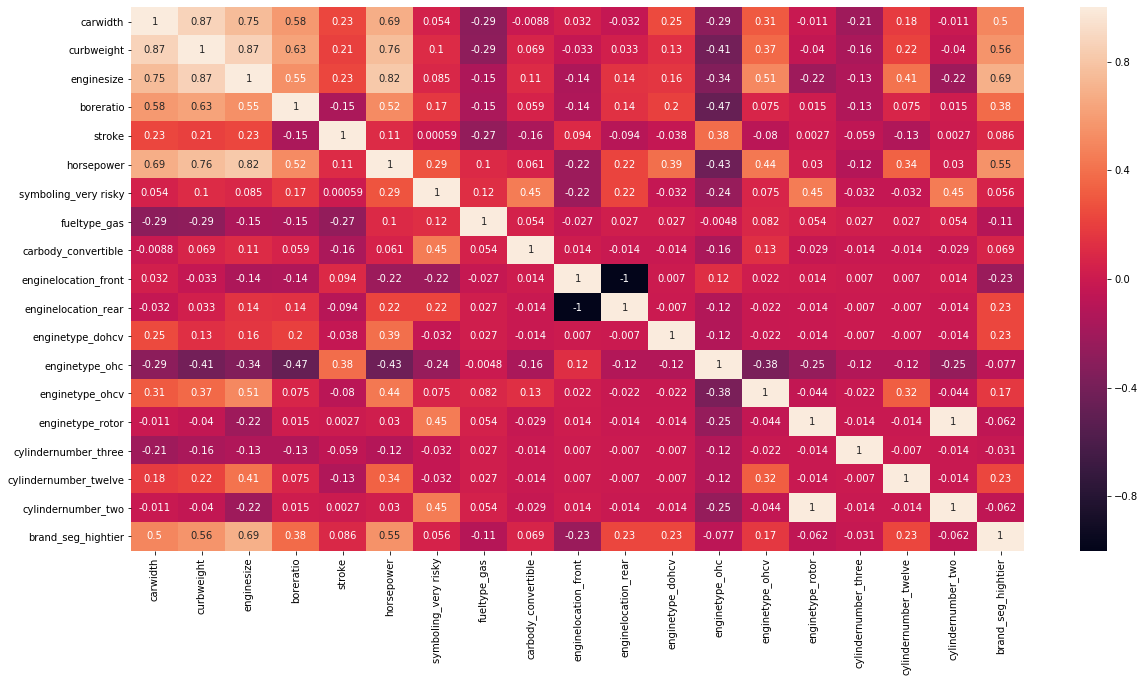

In [62]:
plt.figure(figsize = (20,10))  

ax= sns.heatmap(X_train1.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

It is observed from above statistics and heatmap that:
For **enginetype_rotor** and **cylindernumber_two** are showing high correlation with each other. 
However, enginetype_rotor is more bussiness significant variable than cylindernumber_two which also has a high VIF.

Thus, it can be inferred that it is insignificant in presence of other variables; and can be dropped.

In [63]:
X_train2 = X_train1.drop('cylindernumber_two', axis=1)
lm2=fit_LRM(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.25e-73
Time:                        18:10:04   Log-Likelihood:                 231.83
No. Observations:                 143   AIC:                            -427.7
Df Residuals:                     125   BIC:                            -374.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

In [64]:
calVIF(X_train2)

,Features,VIF
9,enginelocation_front,73.12
2,enginesize,22.59
1,curbweight,11.87
5,horsepower,8.75
0,carwidth,5.20
17,brand_seg_hightier,3.58
4,stroke,3.31
12,enginetype_ohc,3.19
14,enginetype_rotor,2.78
3,boreratio,2.76


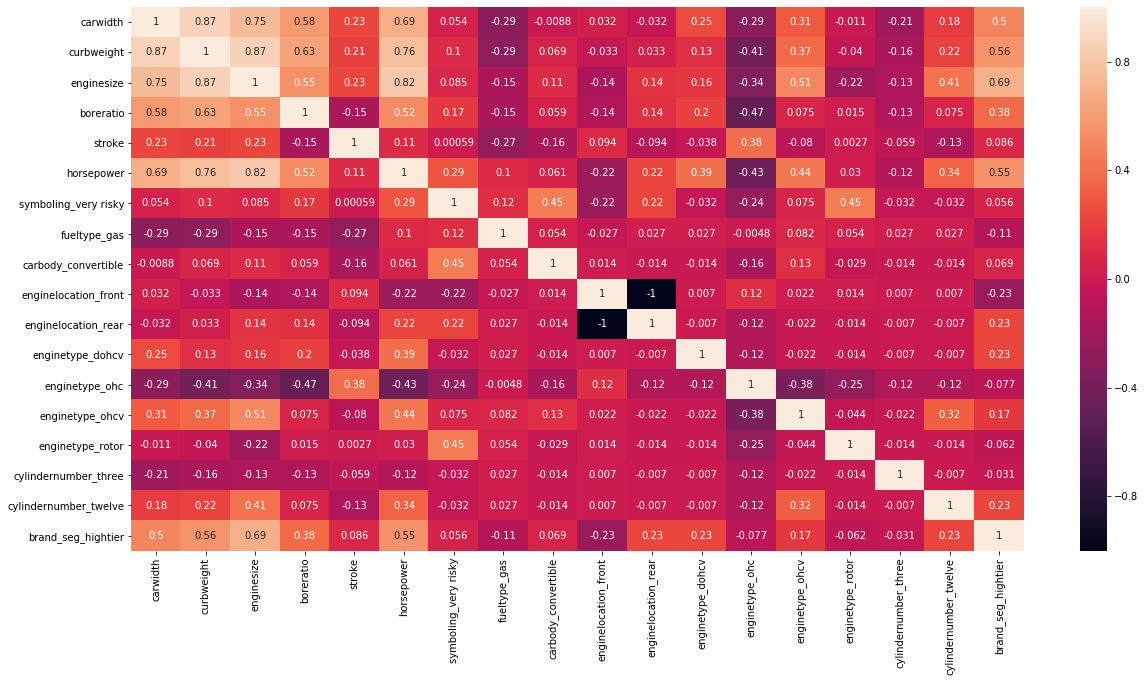

In [65]:
plt.figure(figsize = (20,10))  

ax= sns.heatmap(X_train2.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

It is observed from above statistics that:
For **enginelocation_front** VIF > 10, thus, it can be inferred that enginelocation_front is insignificant in presence of other variables; it can be dropped.

In [66]:
X_train3 = X_train2.drop('enginelocation_front', axis=1)
lm3=fit_LRM(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.25e-73
Time:                        18:10:13   Log-Likelihood:                 231.83
No. Observations:                 143   AIC:                            -427.7
Df Residuals:                     125   BIC:                            -374.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

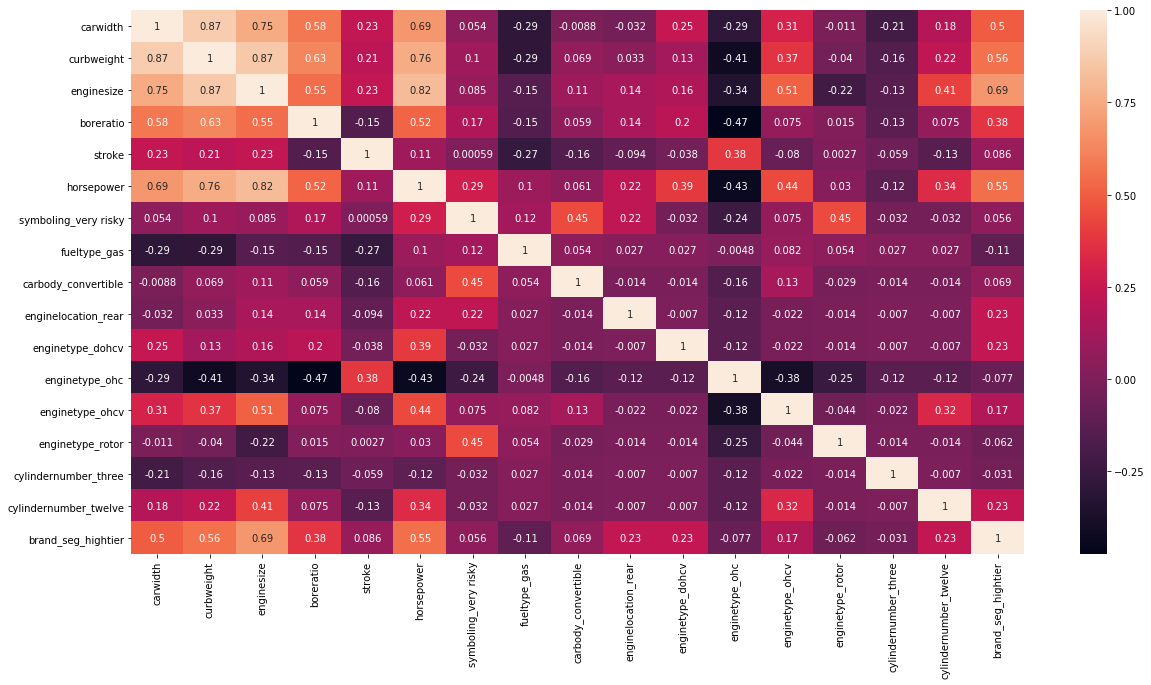

In [67]:
plt.figure(figsize = (20,10))  

ax= sns.heatmap(X_train3.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [68]:
calVIF(X_train3)

,Features,VIF
2,enginesize,73.83
1,curbweight,52.70
0,carwidth,36.80
4,stroke,31.10
5,horsepower,23.36
3,boreratio,14.62
7,fueltype_gas,10.05
11,enginetype_ohc,9.98
16,brand_seg_hightier,4.07
13,enginetype_rotor,2.84


It is observed from above statistics that: For **enginesize**, VIF > 10, thus, it can be inferred that enginesize is insignificant in presence of other variables; it can be dropped.

In [69]:
X_train4 = X_train3.drop('enginesize', axis=1)
lm4=fit_LRM(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     132.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.02e-70
Time:                        18:10:18   Log-Likelihood:                 223.13
No. Observations:                 143   AIC:                            -412.3
Df Residuals:                     126   BIC:                            -361.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [70]:
calVIF(X_train4)

,Features,VIF
1,curbweight,45.87
0,carwidth,36.80
4,horsepower,20.22
3,stroke,19.70
2,boreratio,13.45
6,fueltype_gas,9.97
10,enginetype_ohc,8.63
5,symboling_very risky,2.76
15,brand_seg_hightier,2.16
9,enginetype_dohcv,1.87


By the rule, we always carryout elimination in the following manner:

1. High p-value, High VIF
2. High-Low:
    - High p-value, Low VIF ---> Remove these first
    - Low p-value, High VIF ---> Remove these after the ones above
3. Low p-value, Low VIF


Thus in this case we drop **enginetype_ohcv** with high p-value and low VIF instead of curbweight with highest p-value.

In [71]:
X_train5 = X_train4.drop('enginetype_ohcv', axis=1)
lm5=fit_LRM(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     142.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.38e-72
Time:                        18:10:21   Log-Likelihood:                 223.00
No. Observations:                 143   AIC:                            -414.0
Df Residuals:                     127   BIC:                            -366.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

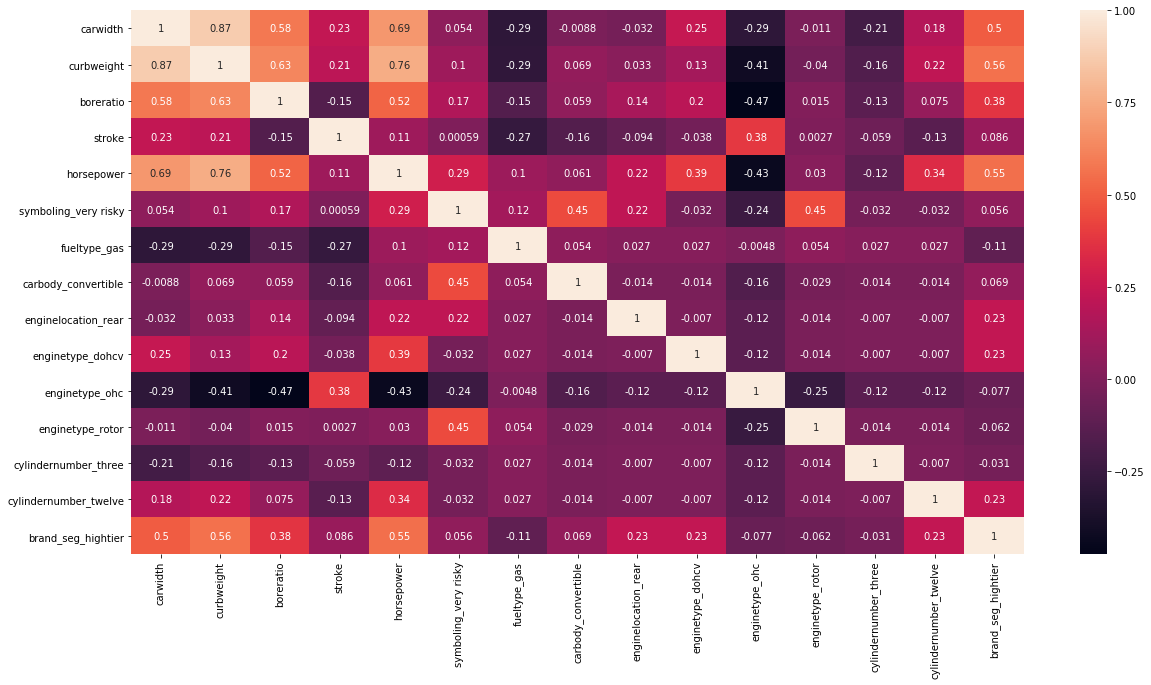

In [72]:
plt.figure(figsize = (20,10))  

ax= sns.heatmap(X_train5.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [73]:
calVIF(X_train5)

,Features,VIF
1,curbweight,45.86
0,carwidth,36.19
3,stroke,19.70
4,horsepower,19.52
2,boreratio,12.41
6,fueltype_gas,9.70
10,enginetype_ohc,8.11
5,symboling_very risky,2.76
14,brand_seg_hightier,2.16
9,enginetype_dohcv,1.80


It is observed from above statistics that: For **curbweight**, VIF>10, thus it must be eliminated from the model.

In [74]:
X_train6= X_train5.drop(['curbweight'], axis=1)
lm6=fit_LRM(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.70e-70
Time:                        18:10:26   Log-Likelihood:                 215.35
No. Observations:                 143   AIC:                            -400.7
Df Residuals:                     128   BIC:                            -356.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

In [75]:
calVIF(X_train6)

,Features,VIF
0,carwidth,22.06
2,stroke,18.19
3,horsepower,14.75
1,boreratio,11.01
5,fueltype_gas,8.73
9,enginetype_ohc,7.69
4,symboling_very risky,2.64
13,brand_seg_hightier,2.05
10,enginetype_rotor,1.69
6,carbody_convertible,1.56


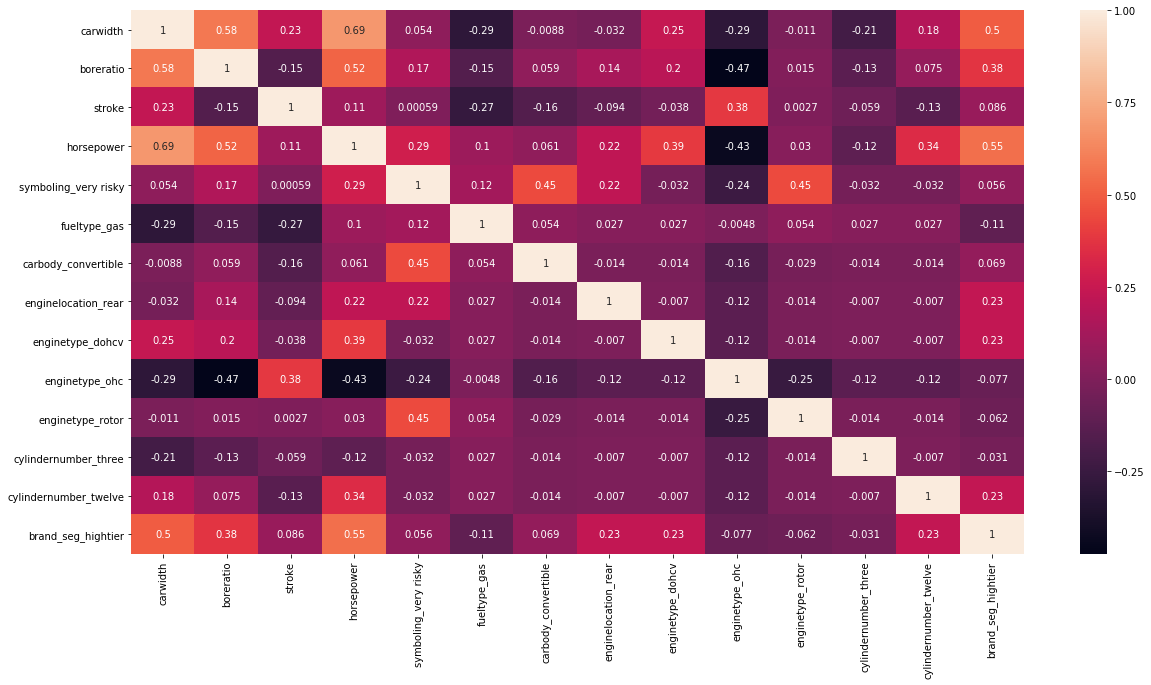

In [76]:
plt.figure(figsize = (20,10))  

ax= sns.heatmap(X_train6.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

It is observed from above statistics that: For **boreratio**, VIF > 10 and p-value > 0.05, thus, it can be inferred that boreratio is insignificant in presence of other variables; it can be dropped.

In [77]:
X_train7= X_train6.drop(['boreratio'], axis=1)
lm7=fit_LRM(X_train7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     148.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.15e-71
Time:                        18:10:29   Log-Likelihood:                 214.89
No. Observations:                 143   AIC:                            -401.8
Df Residuals:                     129   BIC:                            -360.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [78]:
calVIF(X_train7)

,Features,VIF
1,stroke,18.19
2,horsepower,14.59
0,carwidth,14.29
4,fueltype_gas,7.53
8,enginetype_ohc,7.46
3,symboling_very risky,2.61
12,brand_seg_hightier,2.04
9,enginetype_rotor,1.68
5,carbody_convertible,1.56
7,enginetype_dohcv,1.38


It is observed from above statistics that: For **stroke**, VIF > 10, thus, it can be inferred that stroke is insignificant in presence of other variables; it can be dropped.

In [79]:
X_train8= X_train7.drop(['stroke'], axis=1)
lm8=fit_LRM(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     156.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.34e-71
Time:                        18:10:31   Log-Likelihood:                 212.51
No. Observations:                 143   AIC:                            -399.0
Df Residuals:                     130   BIC:                            -360.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [80]:
calVIF(X_train8)

,Features,VIF
1,horsepower,13.49
0,carwidth,10.94
3,fueltype_gas,7.53
7,enginetype_ohc,4.08
2,symboling_very risky,2.61
11,brand_seg_hightier,1.93
8,enginetype_rotor,1.61
4,carbody_convertible,1.56
6,enginetype_dohcv,1.32
5,enginelocation_rear,1.26


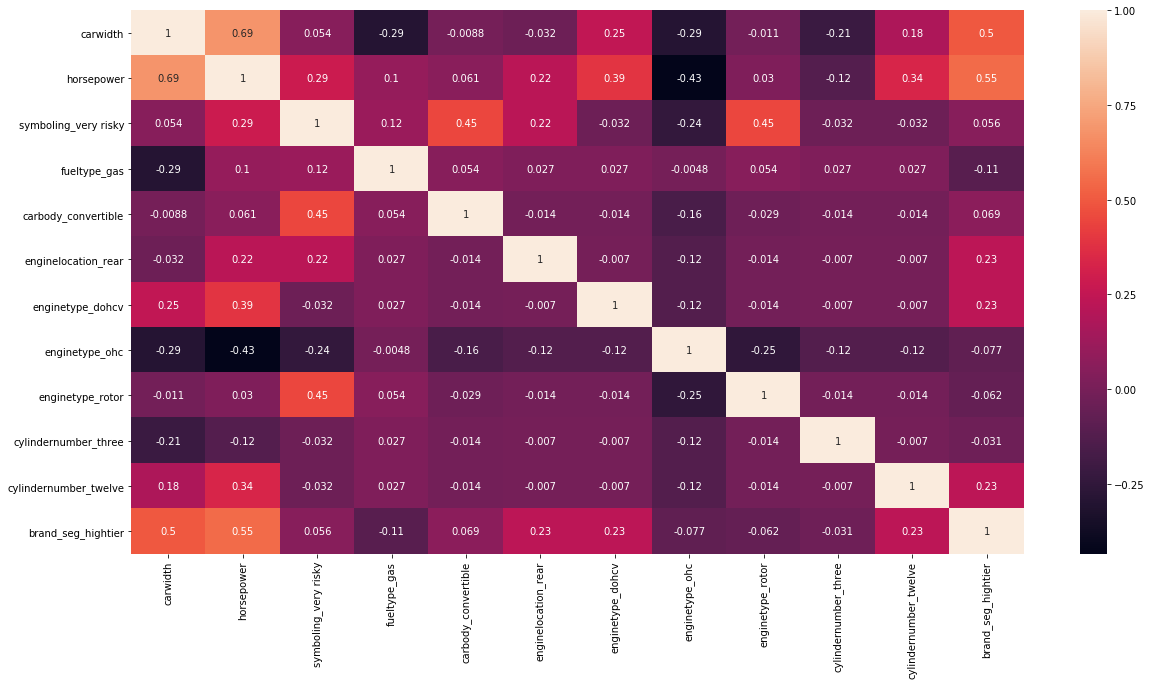

In [81]:
plt.figure(figsize = (20,10))  

ax= sns.heatmap(X_train8.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- Removing "stroke", lowers the Adj. R-Squared to 0.929, which is still a significant fit.
- enginetype_ohc has its p-value increased to 0.092 which is > 0.05. Thus we can drop it

In [82]:
X_train9= X_train8.drop(['enginetype_ohc'], axis=1)
lm9=fit_LRM(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.66e-71
Time:                        18:10:35   Log-Likelihood:                 210.95
No. Observations:                 143   AIC:                            -397.9
Df Residuals:                     131   BIC:                            -362.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [83]:
calVIF(X_train9)

,Features,VIF
1,horsepower,10.38
0,carwidth,9.03
3,fueltype_gas,4.49
2,symboling_very risky,2.55
10,brand_seg_hightier,1.84
4,carbody_convertible,1.49
7,enginetype_rotor,1.48
6,enginetype_dohcv,1.32
9,cylindernumber_twelve,1.26
5,enginelocation_rear,1.25


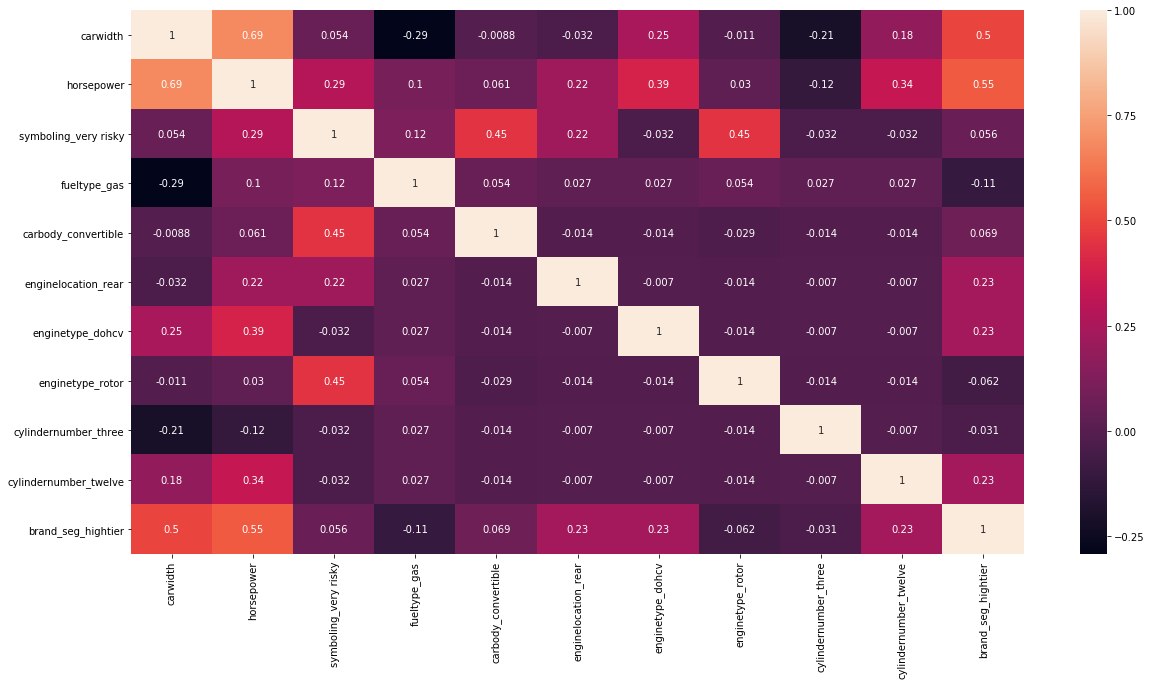

In [84]:
plt.figure(figsize = (20,10))  

ax= sns.heatmap(X_train9.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- Horsepower is more bussiness significant variable that carwidth which also has a high VIF.
- carwidth is correlated with horsepower. Thus, it must be dropped.

In [85]:
X_train10= X_train9.drop(['carwidth'], axis=1)
lm10=fit_LRM(X_train10)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     117.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.00e-60
Time:                        18:10:47   Log-Likelihood:                 181.03
No. Observations:                 143   AIC:                            -340.1
Df Residuals:                     132   BIC:                            -307.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [86]:
X_train11= X_train10.drop(['enginelocation_rear'], axis=1)
lm11=fit_LRM(X_train11)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     131.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.69e-62
Time:                        18:10:48   Log-Likelihood:                 181.01
No. Observations:                 143   AIC:                            -342.0
Df Residuals:                     133   BIC:                            -312.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

It is observed from above statistics that: For **cylindernumber_three**, p-value > 0.05, thus, it can be inferred that cylindernumber_three is insignificant in presence of other variables; it can be dropped.

In [87]:
X_train12= X_train11.drop(['cylindernumber_three'], axis=1)
lm12=fit_LRM(X_train12)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.69e-63
Time:                        18:10:49   Log-Likelihood:                 180.88
No. Observations:                 143   AIC:                            -343.8
Df Residuals:                     134   BIC:                            -317.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

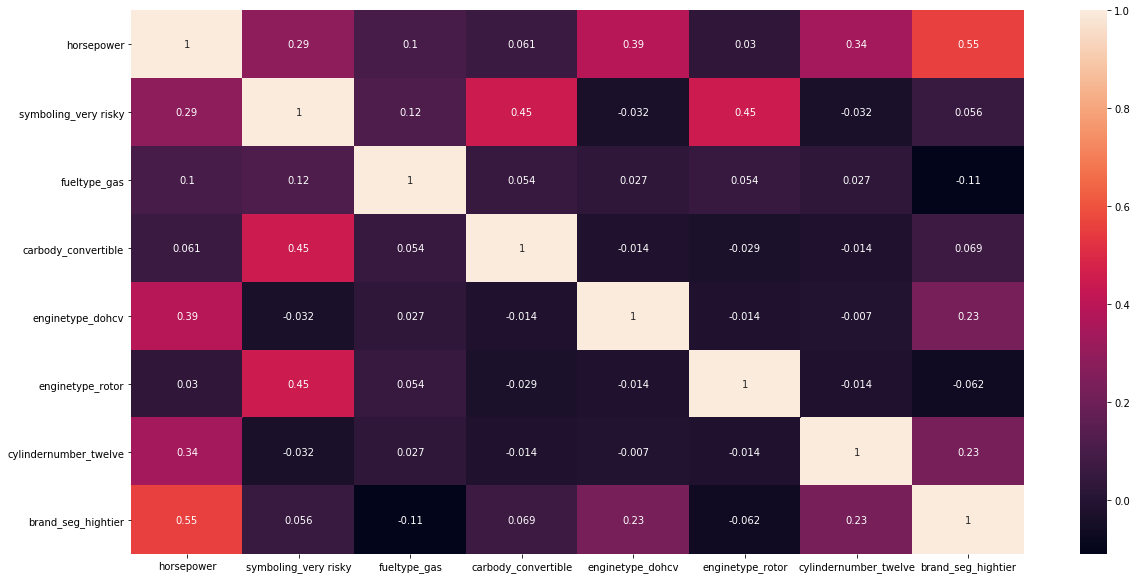

In [88]:
plt.figure(figsize = (20,10))  

ax= sns.heatmap(X_train12.corr(), annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [89]:
calVIF(X_train12)

,Features,VIF
0,horsepower,5.73
2,fueltype_gas,3.40
1,symboling_very risky,2.30
7,brand_seg_hightier,1.75
3,carbody_convertible,1.44
5,enginetype_rotor,1.44
4,enginetype_dohcv,1.24
6,cylindernumber_twelve,1.18


Here it can be seen that **horsepower** has VIF>5. However, it is in the **borderline-acceptable** range. Thus to preserve its business significance, we include it in our model.

All the other independent variable have considerably low VIF and the Adj. R-Squared is 0.893 which is quite a significant fit. 

We will conclude with these variables as the final model predictor variables.

In [90]:
#Let's see the summary of our linear model
print(lm12.params)

const                    0.118620
horsepower               0.932832
symboling_very risky    -0.093503
fueltype_gas            -0.150853
carbody_convertible      0.173519
enginetype_dohcv        -0.466397
enginetype_rotor         0.105003
cylindernumber_twelve   -0.238272
brand_seg_hightier       0.291894
dtype: float64


## Step 5: Residual Analysis of the train data:
To check if the error terms are also normally distributed, we plot the histogram of the error terms.

In [91]:
# Adding a constant variable 
X_train12 = sm.add_constant(X_train12)

lm12 = sm.OLS(y_train,X_train12).fit()  # Running the linear model

# Summary of our linear model
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.69e-63
Time:                        18:10:58   Log-Likelihood:                 180.88
No. Observations:                 143   AIC:                            -343.8
Df Residuals:                     134   BIC:                            -317.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [92]:
y_train_pred = lm12.predict(X_train12)

Text(0.5, 0, 'Errors')

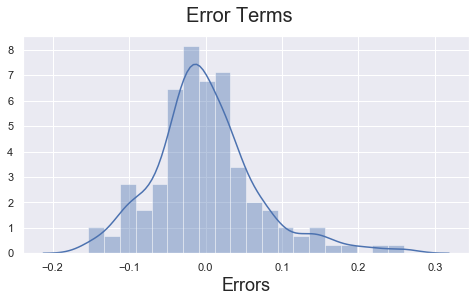

In [93]:
# Plot the histogram of the error terms
res = y_train - y_train_pred # Residual calculation

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Although this is not the perfect normal distribution, in essence that it is not centered perfectly but almost around zero. 

There is some error variance along the tails meaning model is still not able to explain some variance.

Considering the size of the train and test data this error term distribution still is almost close to a normal distribution.

## Step 6: Predictions:


**Applying the scaling on the test sets:**

In [94]:
num_vars # The same variables we used on the train data-set

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [95]:
df_test[num_vars] = scaler.transform(df_test[num_vars]) # Fit on the data

#### Dividing into X_test and y_test:

In [96]:
y_test = df_test.pop('price')
X_test = df_test

In [97]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_train12= X_train12.drop(['const'], axis=1)
X_test_new = X_test[X_train12.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [98]:
# Making predictions
y_pred = lm12.predict(X_test_new)

## Step 7: Model evaluation on the test set

Text(0, 0.5, 'y_pred')

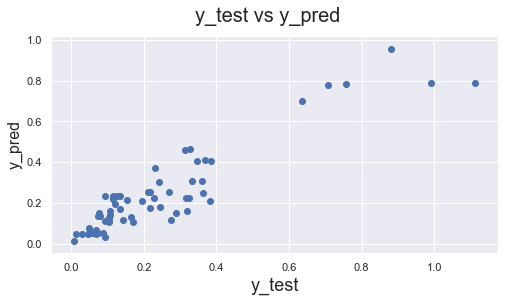

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
#plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [100]:
# Calculating R-square and RMSE for model evalualtion:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.08818322834067528
Model r2_score: 0.85450816520075


The following can be observed from above calculation:

- r2_score on this test data (0.854) is very close to the trained Adj. R-Squared value of the model (0.893) which means that the model is able to explain 85.4% of the variance which is pretty good.

RMSE (Root Mean Squared Error) is a metric that shows the deviation of the predicted values by a model from the actual observed values.
Since it is a sort of error term, the lower the RMSE, the better model it is.
- In this case we have a significantly high r2_score and a low RMSE of 0.088.

# Final Inference:

Final inference from model evaluation

With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.

Final predictors which can be proposed are

- **horsepower**: 
        coef = 0.9328, p-value = 0.000
- **symboling_very_risky**: 
        coef = -0.0935, p-value = 0.000
- **fueltype_gas**: 
        coef = -0.1509, p-value = 0.000
- **carbody_convertible**: 
        coef = 0.1735, p-value = 0.000
- **enginetype_dohcv**: 
        coef = -0.4664, p-value = 0.000
- **enginetype_rotor**: 
        coef = 0.1050, p-value = 0.014
- **cylindernumber_twelve**:
        coef = -0.2383, p-value = 0.003
- **brand_seg_hightier**: 
        coef = 0.2919, p-value = 0.000
Also we have a constant with coef = 0.1186 and p-value = 0.000

We can see that the equation of our best fitted line is:

$ price = 0.1186 + 0.9328 \times horsepower - 0.0935 \times symboling\_very\_risky - 0.1509 \times fueltype\_gas + 0.1735 \times carbody\_convertible - 0.4664 \times enginetype\_dohcv + 0.1050 \times enginetype\_rotor - 0.2383 \times  cylindernumber\_twelve + 0.2919 \times brand\_seg\_hightier $